<a href="https://colab.research.google.com/github/FREYDER18/PARCIAL-2025-1/blob/main/SOLUCION_PUNTO_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**punto 4**

Sea $x′′(t)$ la segunda derivada de la señal $x(t)$, donde $t$ $∈$ $[ti, tf]$. Demuestre que los coeficientes de la serie exponencial de Fourier se pueden calcular según:
$$
c_{n}=\frac{1}{(ti-tf)n^{2}w_{o}^{2}}\int_{t_i}^{t_f}x^{''}(t)e^{-jnw_{o}t}dt;\quad n\in\mathbb{Z}
$$
¿Cómo se pueden calcular los coeficientes an y bn desde $x′′(t)$ en la serie trigonométrica de Fourier?.

Encuentre el espectro de Fourier, su magnitud, fase, parte real, parte imaginaria y el error relativo de reconstrucción para $n∈{0,±1,±2,±3,±4,±5}$, a partir de $x′′(t)$ para la señal $x(t)$ en la Figura 1 . Compruebe el espectro obtenido con la estimación a partir de $x(t)$ y presente las respectivas simulaciones sobre Python.
 desarrollos con Sympy.

- Codigo punto 4.

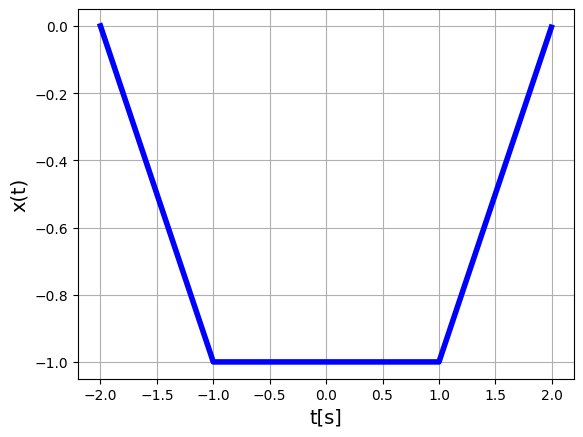

In [4]:
# Importación de librerías para gráficos y manipulación numérica
from ipywidgets import interact,IntSlider
import numpy as np
import matplotlib.pyplot as plt

# Parámetros para definir la escala y forma de la señal
A=1        #Amplitud de la señal
d2=2       #Extremo derecho del trapecio
d1=1       #Límite de la parte plana del trapecio

#Generar señal parametrizada en función del tiempo
T = 2*d2       # Periodo total de la señal
Fo = 1/T       # Frecuencia fundamental de la señal
Fs = 1000*Fo   # Frecuencia de muestreo muy alta para buena resolución
tv = np.arange(-T/2,T/2,1/Fs) # Vector de tiempo para graficar la señal
Nm = len(tv)   # Cantidad de puntos evaluados

# Definición de una función que genera una señal trapezoidal en base a cuatro puntos clave
def funcion_trapecio(x, a, b, c, d):
    """
Parámetros:
x: vector de tiempo
a: inicio de rampa ascendente
b: inicio de la meseta
c: final de la meseta
d: final de rampa descendente
    """
    # Implementación por tramos con funciones máximo y mínimo
    return np.maximum(0, np.minimum((x - a) / (b - a), np.minimum(1, (d - x) / (d - c))))

# Se genera la señal evaluando en el vector de tiempo y usando los puntos establecidos
x = -funcion_trapecio(tv, -d2, -d1, d1, d2)

#graficar señal original
plt.plot(tv,x,'b',linewidth=4)
plt.grid()
plt.xlabel("t[s]",fontsize = 14)
plt.ylabel("x(t)",fontsize = 14)
plt.show()

<ipython-input-5-574764a1c37c>:19: RuntimeWarning: invalid value encountered in divide
  Cn = (-2*(np.cos(nv*np.pi) - np.cos(nv*np.pi*0.5))) / (np.pi * 2 * nv * 2)


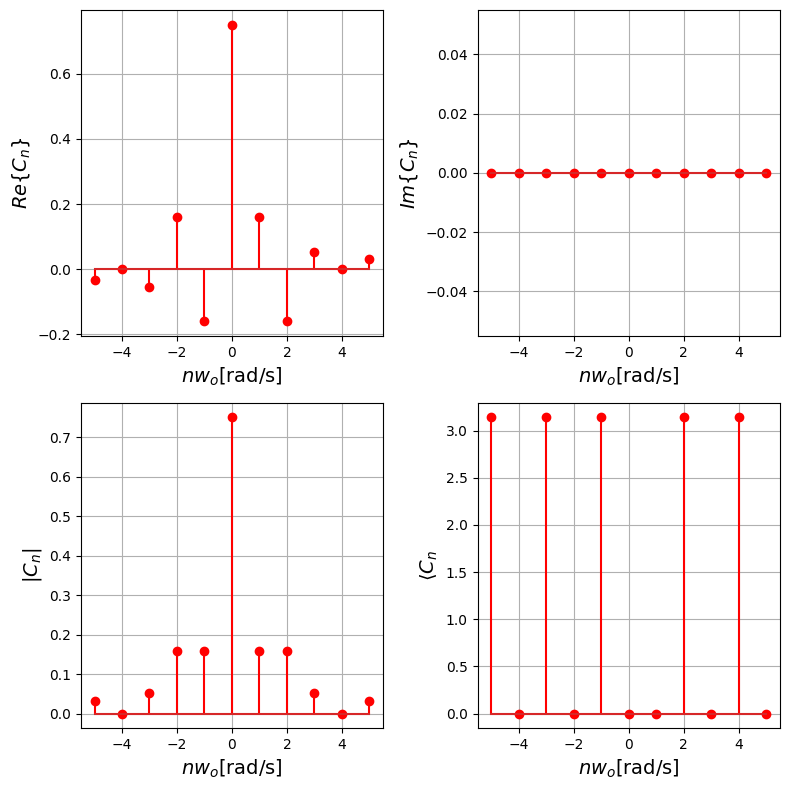

In [5]:
N = 5  # Cantidad de armónicos positivos y negativos a considerar
wo = 2 * np.pi / T  # Frecuencia angular fundamental de la señal periódica

# Generar las funciones base complejas para los armónicos de Fourier.
# phin será una matriz que almacenará las exponenciales complejas correspondientes a cada armónico.
phin = np.zeros((Nm, 2*N+1), np.complex128)  # Inicializa matriz de ceros de tipo complejo

# Se recorre desde -N hasta N para calcular el valor de cada exponencial compleja
for n in range(-N, N+1, 1):
    phin[:, n+N] = np.exp(1j * n * wo * tv)  # Cálculo de la base exponencial para cada armónico

# Calcular manualmente los coeficientes Cn de la serie de Fourier para la señal generada
cn = np.zeros(2*N+1, np.complex128)  # Vector para guardar los coeficientes complejos

nv = np.linspace(-N, N, 2*N+1)  # Vector con los valores de los armónicos (índice n)

# Fórmula teórica de los coeficientes Cn de Fourier para un trapecio simétrico
# Se obtiene aplicando la integral de Fourier a la forma trapezoidal definida antes
Cn = (-2*(np.cos(nv*np.pi) - np.cos(nv*np.pi*0.5))) / (np.pi * 2 * nv * 2)

# Se ajusta el valor de la componente DC (n=0), que no puede calcularse con la fórmula anterior
Cn[N] = 3/4  # Valor medio de la señal (componente de frecuencia cero)



#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(Cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(Cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(Cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

In [6]:
Px = 2/3 # Potencia de la señal original

# La función pltest, ayuda a la reconstrucción y grafico de la señal
def pltest(Na=1):
    ind = np.arange(N-Na,N+Na+1)
    er = 1- np.sum(abs(Cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(Cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='x(t)') #señal original
    plt.title('$E_r$=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()

    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=5, min=1), Output()), _dom_classes=('widget-int…

<function __main__.pltest(Na=1)>